<a href="https://colab.research.google.com/github/mariatozi/codigos-estudos/blob/main/Ol%C3%A1%2C_este_%C3%A9_o_Colaboratory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import openpyxl

In [11]:
df = pd.read_excel('InfoNovo.xlsx')
workbook = openpyxl.load_workbook('InfoNovo.xlsx')
sheet = workbook.active
# Ou você pode escolher uma planilha específica: workbook['NomeDaPlanilha']


In [12]:
df.head()

,Unnamed: 0,Problema,Mês,Colaborador,Colaborador-nome-ajustado,Equipe,Descrição,Desc-tratado
0,0,2023-08-02,agosto,Vivian Teixeira de Oliveira,Vivian Teixeira de Oliveira,Carmem Lapa - Plantao Noturno,Queda de ligação,Ligações que tiveram queda (durante ou na fina...
1,1,2023-08-02,agosto,Vivian Teixeira de Oliveira,Vivian Teixeira de Oliveira,Carmem Lapa - Plantao Noturno,Queda de ligação,Ligações que tiveram queda (durante ou na fina...
2,2,2023-08-02,agosto,Vivian Teixeira de Oliveira,Vivian Teixeira de Oliveira,Carmem Lapa - Plantao Noturno,Queda de ligação,Ligações que tiveram queda (durante ou na fina...
3,3,2023-08-02,agosto,ALENE XAVIER DOS SANTOS,ALENE XAVIER DOS SANTOS,Natalia Lima- SAS/ Allianz,Ligação muda (entrou muda no início do atendim...,Falha nas ligações que ocorreram durante o ate...
4,4,2023-08-02,agosto,ALENE XAVIER DOS SANTOS,ALENE XAVIER DOS SANTOS,Natalia Lima- SAS/ Allianz,Queda de ligação,Ligações que tiveram queda (durante ou na fina...


In [13]:
contagem_valores = df['Desc-tratado'].value_counts()
print(contagem_valores)

Ligações que tiveram queda (durante ou na finalização)                      1237
Ligações mudas e/ou sem retorno de voz                                       496
Fluxo falha pesquisa de satisfação                                           101
Fluxo de sistemas ou telefonia                                                71
Queda de energia/internet                                                     18
Falha nas ligações que ocorreram durante o atendimento (mudas ou caindo)      11
Falhas nos itens físicos ou Falhas HomeBased                                   9
Sem informação                                                                 6
Ligações com falhas/ruídos ou não completam                                    5
Abandono ou desconexão realizada em linha pelo cliente                         5
Falhas Home Based - Sistemas                                                   5
Ligações que ficaram mudas e cairam direto                                     4
Falha nas ligações ao entrar

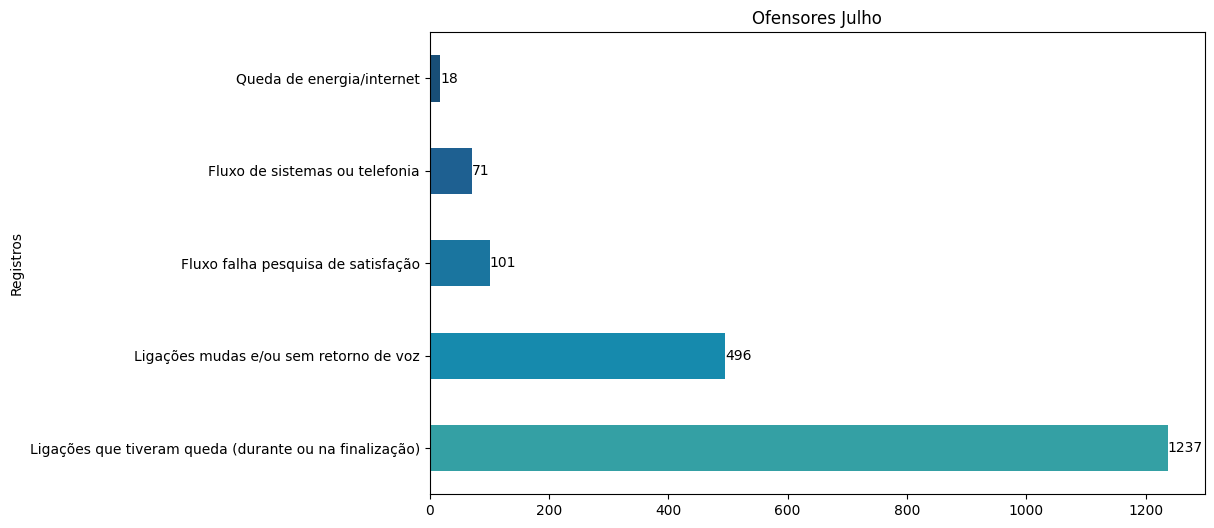

In [14]:
# Carregar o arquivo Excel em um DataFrame
caminho_arquivo = 'InfoNovo.xlsx'
df = pd.read_excel(caminho_arquivo)

# Selecionar a coluna com informações ofensivas
coluna_ofensiva = 'Desc-tratado'  # Substitua pelo nome da coluna com informações ofensivas
df_ofensas = df[coluna_ofensiva]

# Contar a frequência das informações ofensivas
contagem_ofensas = df_ofensas.value_counts().head(5)

cores_personalizadas = ['#184e77', '#1e6091', '#1a759f', '#168aad', '#34a0a4']

# Criar um gráfico de barras horizontais para os 10 registros mais ofensores
plt.figure(figsize=(10, 6))
ax = contagem_ofensas.sort_values().plot(kind='barh', color=cores_personalizadas)
plt.ylabel('Registros')
plt.title('Ofensores Julho')

# Adicionar rótulos de dados nas barras do gráfico
ax.bar_label(ax.containers[0])

plt.gca().invert_yaxis()  # Inverter o eixo y para ter o maior valor no topo
plt.show()

In [30]:
def substituir_valor(texto):
  if texto in ['Ligações mudas e/ou sem retorno de voz']:
    return 'Falhas operacionais'

  elif texto in ['Fluxo de sistemas ou telefonia',
                 'Fluxo falha pesquisa de satisfação',
                 'Falhas Home Based - Sistemas',
                 'Ligações com falhas/ruídos ou não completam']:
    return 'Fluxo indevido - S&T'

  elif texto in ['Falha nas ligações ao entrar na URA - Comportamento Call Center']:
    return 'Comportamento call center - Operacional'

  elif texto in ['Queda de energia/internet']:
    return 'Fluxo patrimônio ou service desk'

  elif texto in ['Falhas nos itens físicos ou Falhas HomeBased']:
    return 'Fluxo patrimônio'

  elif texto in ['Sem informação']:
    return 'Reorientação liderança'

  elif texto in ['Abandono ou desconexão realizada em linha pelo cliente']:
    return 'Seguir orientações operacionais e procedimento'

  else:
    return 'Não se aplicam as segmentações'

In [ ]:
# Ligações que tiveram queda (durante ou na finalização)                      1237
# ---Ligações mudas e/ou sem retorno de voz                                       496
# ---Fluxo falha pesquisa de satisfação                                           101
# ---Fluxo de sistemas ou telefonia                                                71
# ---Queda de energia/internet                                                     18
# Falha nas ligações que ocorreram durante o atendimento (mudas ou caindo)      11
# ---Falhas nos itens físicos ou Falhas HomeBased                                   9
# ---Sem informação                                                                 6
# ---Ligações com falhas/ruídos ou não completam                                    5
# ---Abandono ou desconexão realizada em linha pelo cliente                         5
# ---Falhas Home Based - Sistemas                                                   5
# Ligações que ficaram mudas e cairam direto                                     4
# ---Falha nas ligações ao entrar na URA - Comportamento Call Center                3

In [24]:
# Defina o título da nova coluna
new_column_title = 'Dados-segmentados'
sheet['C1'] = new_column_title

# Preencha os valores na nova coluna
for row in sheet.iter_rows(min_row=2, max_row=sheet.max_row):  # Comece da segunda linha
    cell = row[2]  # Acessa a terceira coluna (coluna "C")
    cell.value = "Dados-segmentados"  # Defina o valor que você deseja


In [25]:
df['Dados-segmentados'] = df['Desc-tratado'].apply(substituir_valor)

In [26]:
df

,Unnamed: 0,Problema,Mês,Colaborador,Colaborador-nome-ajustado,Equipe,Descrição,Desc-tratado,Dados-segmentados
0,0,2023-08-02,agosto,Vivian Teixeira de Oliveira,Vivian Teixeira de Oliveira,Carmem Lapa - Plantao Noturno,Queda de ligação,Ligações que tiveram queda (durante ou na fina...,Não se aplicam as segmentações
1,1,2023-08-02,agosto,Vivian Teixeira de Oliveira,Vivian Teixeira de Oliveira,Carmem Lapa - Plantao Noturno,Queda de ligação,Ligações que tiveram queda (durante ou na fina...,Não se aplicam as segmentações
2,2,2023-08-02,agosto,Vivian Teixeira de Oliveira,Vivian Teixeira de Oliveira,Carmem Lapa - Plantao Noturno,Queda de ligação,Ligações que tiveram queda (durante ou na fina...,Não se aplicam as segmentações
3,3,2023-08-02,agosto,ALENE XAVIER DOS SANTOS,ALENE XAVIER DOS SANTOS,Natalia Lima- SAS/ Allianz,Ligação muda (entrou muda no início do atendim...,Falha nas ligações que ocorreram durante o ate...,Não se aplicam as segmentações
4,4,2023-08-02,agosto,ALENE XAVIER DOS SANTOS,ALENE XAVIER DOS SANTOS,Natalia Lima- SAS/ Allianz,Queda de ligação,Ligações que tiveram queda (durante ou na fina...,Não se aplicam as segmentações
...,...,...,...,...,...,...,...,...,...
1966,1966,2023-08-23,agosto,JAMILA LAYZA BATISTA SILVA,JAMILA LAYZA BATISTA SILVA,Anne Santos - BB/Mapfre,Queda de ligação,Ligações que tiveram queda (durante ou na fina...,Não se aplicam as segmentações
1967,1967,2023-08-23,agosto,JAMILA LAYZA BATISTA SILVA,JAMILA LAYZA BATISTA SILVA,Anne Santos - BB/Mapfre,Queda de ligação,Ligações que tiveram queda (durante ou na fina...,Não se aplicam as segmentações
1968,1968,2023-08-23,agosto,RAYXA KHELLY UCELI NEVES,RAYXA KHELLY UCELI NEVES,Anne Santos - BB/Mapfre,Queda de ligação,Ligações que tiveram queda (durante ou na fina...,Não se aplicam as segmentações
1969,1969,2023-08-23,agosto,JHENIFER GABRIELA DOS SANTOS DAMACENO,JHENIFER GABRIELA DOS SANTOS DAMACENO,Anne Santos - BB/Mapfre,Queda de ligação,Ligações que tiveram queda (durante ou na fina...,Não se aplicam as segmentações


In [27]:
df.to_excel('Tratados.xlsx')